In [ ]:
#!pip install spotipy --upgrade

In [16]:
import pandas as pd
import numpy as np

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth

import os
import glob 

In [36]:
# credenciales
client_id = 'd79be57878574024979e595db7c3a1e2'        
client_secret = 'e2d86db572d241edaa51a2ad2aa4e9a7'       

# nos conectamos a la api
client_credentials_manager = SpotifyClientCredentials( client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager, language="es")

In [24]:
busqueda = sp.search(q="datos", type='show', limit=1, offset=0, market="MX")
busqueda["shows"]["items"]

[{'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AR',
   'AT',
   'AU',
   'BA',
   'BB',
   'BE',
   'BF',
   'BG',
   'BH',
   'BJ',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BZ',
   'CA',
   'CH',
   'CL',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR',
   'HT',
   'HU',
   'ID',
   'IE',
   'IL',
   'IN',
   'IS',
   'IT',
   'JM',
   'JO',
   'JP',
   'KE',
   'KI',
   'KN',
   'KW',
   'LB',
   'LC',
   'LI',
   'LR',
   'LS',
   'LT',
   'LU',
   'LV',
   'MA',
   'MC',
   'ME',
   'MG',
   'MH',
   'MK',
   'ML',
   'MT',
   'MU',
   'MV',
   'MW',
   'MX',
   'MY',
   'MZ',
   'NA',
   'NE',
   'NG',
   'NI',
   'NL',
   'NO',
   'NR',
   'NZ',
   'OM',
   'PA',
   'PE',
   'PG',
   'PH',
   'PL',
   'PS',
   'PT',
   'PW'

In [3]:
# buscamos palabras claves
words = ["leyenda", "creativo", "datos", "comedia", "cultura", "idioma", "musica", "mente", "escuelas", 
         "libros", "noticias", "deportes", "tecnología", "comida", "tacos", "educacion", "politica", 
         "negocios", "autoayuda", "historia", "finanzas", "arte", "entretenimiento", "terror", "novelas", 
         "juegos", "ajedrez", "salud", "nutricion", "futbol", "vida", "idiomas"]

In [14]:
for pal in words:
    # inicializamos las lista a ocupar
    id_list = []
    name = []
    fecha = []
    episodios = []
    languages = []
    for i in range(0,1000,50): # buscamos 1000 podcats de cada tema
        track_results = sp.search(q=pal, type='show', limit=50, offset=i, market="MX")
        for i, t in enumerate(track_results['shows']['items']):
            # agregamos la informacion importate de los podcasts.
            id_list.append(t["id"])
            name.append(t["name"])
            fecha.append(t["publisher"])
            episodios.append(t["total_episodes"])
            languages.append(t["languages"])

    # creamos el dataframe con los datos.
    podcast_palabra = pd.DataFrame({'name':name,'id_list':id_list,'fecha':fecha,'episodios':episodios,
                             "languages":languages})
    podcast_palabra["languages"] = [x[0] for x in podcast_palabra["languages"]]

    print(pal, podcast_palabra.shape)
    # guadamos los datos.
    podcast_palabra.to_csv("../data/raw/id_podcast/"+pal+".csv", index=False)

leyenda (1000, 5)
creativo (1000, 5)
datos (1000, 5)
comedia (1000, 5)
cultura (1000, 5)
idioma (1000, 5)
musica (1000, 5)
mente (1000, 5)
escuelas (1000, 5)
libros (1000, 5)
noticias (1000, 5)
deportes (1000, 5)
tecnología (1000, 5)
comida (1000, 5)
tacos (1000, 5)
educacion (1000, 5)
politica (1000, 5)
negocios (1000, 5)
autoayuda (314, 5)
historia (1000, 5)
finanzas (1000, 5)
arte (1000, 5)
entretenimiento (1000, 5)
terror (1000, 5)
novelas (1000, 5)
juegos (1000, 5)
ajedrez (89, 5)
salud (1000, 5)
nutricion (1000, 5)


In [17]:
podcast_palabra.head()

,name,id_list,fecha,episodios,languages
0,Nutrición y más,6sLuRquCbFydRmxFTx4pXO,By Twohealth,71,es
1,Nutrición Viva y Celular,18sbTHJXr0ykob09bly9ba,Alexa Shipley,42,es
2,La nutrición y la motivación,2mfamh21nUQNfbCVI2Uqnr,Stephany Aveleyra Vizcarra,34,es
3,Nutrición y Salud con el Dr.Hernández,73UOcqXBVH9TR0LUYllozg,Dr. Antonio Hernández,51,es-ES
4,Esto es Nutricion,08Bu6qJUUyTmP3lYyZVEAS,Stefy y Vicky,39,es


### Concatenamos todos los podcasts

In [25]:
# leemos los archivos en cierta ubicacion
paths = os.listdir("../data/raw/id_podcast")

# inicializamos un dataframe
id_podcast = pd.DataFrame(columns=['name', 'id_list', 'fecha', 'episodios', 'languages'])

# cargamos los archivos de los id podcasts.
for path in paths:
    podcast = pd.read_csv("../data/raw/id_podcast/"+path)
    id_podcast = pd.concat([id_podcast, podcast])
id_podcast.reset_index().drop(columns="index", inplace=True)

In [26]:
# eliminamos duplicados y seleccionamos los que son en espanol
id_podcast = id_podcast.drop_duplicates("id_list")
id_podcast = id_podcast[id_podcast.languages.str.startswith("es", na = False)]
id_podcast = id_podcast[id_podcast.episodios>0] 
id_podcast = id_podcast.reset_index().drop(columns="index")

In [32]:
id_podcast.head()

,name,id_list,fecha,episodios,languages
0,Retorno al Orden: Cultura & Neurociencias,0g0xsECoZNdoye3hlYKzrk,Natalio Ruiz,498,es
1,Cultura General,0YCKKPgRHYMMjxVdMqS4R2,Paola isabel Velasco Lazo,3,es-BO
2,Descarga Cultura.UNAM,3NBoOzdVaubwmPQ7FVIoMb,Descarga Cultura.UNAM,50,es
3,Cultura Fiscal MX,37yPe0sONHdj9ObA3Nt0sk,Mario Beltrán,31,es
4,Cultura Financiera,3gNTbtwu4yrNV2by2Mxcv7,El Instituto para la Cultura Financiera,55,es


In [28]:
len(id_podcast.name.unique())

17756

In [29]:
id_podcast.head(10)

,name,id_list,fecha,episodios,languages
0,Retorno al Orden: Cultura & Neurociencias,0g0xsECoZNdoye3hlYKzrk,Natalio Ruiz,498,es
1,Cultura General,0YCKKPgRHYMMjxVdMqS4R2,Paola isabel Velasco Lazo,3,es-BO
2,Descarga Cultura.UNAM,3NBoOzdVaubwmPQ7FVIoMb,Descarga Cultura.UNAM,50,es
3,Cultura Fiscal MX,37yPe0sONHdj9ObA3Nt0sk,Mario Beltrán,31,es
4,Cultura Financiera,3gNTbtwu4yrNV2by2Mxcv7,El Instituto para la Cultura Financiera,55,es
5,HISTORY CAST DOCUMENTALES,1cEmgReH1pcRjp0kVbvBli,HISTORY LATINOAMÉRICA,15,es
6,Cultura para Cultivar,4muuQZdAvSd8asBYLAQbY0,Epam Latin,112,es
7,Gdelavega Cultura,20U4NeHwY8CSrdaBjizqU2,Garcilaso de la Vega M,14,es-CO
8,Culturalmemente,4eML9pLpjm0uhLTnSVzkE3,culturalmemente,5,es
9,Café y Cultura,5sU02jeYTVFHEfHsteSeiZ,jose esparza,276,es


In [30]:
# inicializamos las listas a ocupar.
description = []
duration = []
id_episodio = []
language = []
name = []
release_date = []
typ = []
name_podcast = []
publiser = []
id_publiser = []
total_episodios = []

for i in range(4802, id_podcast.shape[0]): # iteramos por todos los id de los podcasts.
    for num in range(0, id_podcast.loc[i,"episodios"], 50): # iteramos por el numero de episodios
        try:
            episodios = sp.show_episodes(show_id=id_podcast.loc[i, "id_list"], limit=50, offset=num, 
                                     market="MX") # realizamos la consulta
        except:
            print("Error en "+str(i))
            next
        for p, t in enumerate(episodios["items"]):
            # agregamos la informacion
            total_episodios.append(id_podcast.loc[i,"episodios"])
            name_podcast.append(id_podcast.loc[i, "name"])
            publiser.append(id_podcast.loc[i, "fecha"])
            id_publiser.append(id_podcast.loc[i, "id_list"])
            description.append(t["description"])
            duration.append(t["duration_ms"])
            id_episodio.append(t["id"])
            language.append(t["language"])
            name.append(t["name"])
            release_date.append(t["release_date"])
            typ.append(t["type"])
    if (i%5000)==0:
        print(i)
        # creamos el dataframe con todos los capitulos
        cap_complete = pd.DataFrame({'name_podcast':name_podcast, "publiser":publiser, "id_publiser":id_publiser, "total_episodios":total_episodios,
                         "description":description, "duration":duration, "id_episodio": id_episodio,
                         "language":language, "name_episodio":name, "release_date":release_date,
                         "type":typ})
        # guardamos el dataframe procesado.
        cap_complete.to_csv("../data/processed/episodios/cap_complete"+str(i-5000)+str(i)+"-.csv", index=False)
        

Error en 4803
Error en 4803
Error en 4803
Error en 4803
Error en 4803
Error en 4803
Error en 4803
Error en 4803
Error en 4803
Error en 4803
Error en 4803
Error en 4803
Error en 4803
Error en 4803
Error en 4803
Error en 4803
5000
10000
15000


HTTP Error for GET to https://api.spotify.com/v1/shows/7kkiBpKkPl4d3zg1BsYw7u/episodes/ with Params: {'limit': 50, 'offset': 0, 'market': 'MX'} returned 404 due to non existing id


Error en 15398


### Visualizamos los datos

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# leemos las ubicaciones de los episodios
pahts = os.listdir("../data/processed/episodios/")

# inicializamos un dataframe con la estructura definida
episodios = pd.DataFrame(columns=['name_podcast', 'publiser', 'id_publiser', 'total_episodios',
       'description', 'duration', 'id_episodio', 'language', 'name_episodio',
       'release_date', 'type'])

# concatenamos los episodios
for path in pahts:
    df_aux = pd.read_csv("../data/processed/episodios/"+path)
    episodios = pd.concat([episodios, df_aux])
    

# corregimos un error en la fecha
episodios = episodios[episodios["release_date"]!="0201-04-28"] 

# transformamos el tipo fecha y ordenamos los capitulos
episodios["release_date"] = pd.to_datetime(episodios["release_date"])
episodios.sort_values("release_date", inplace=True)

# eliminamos duplicados, reiniciamos los indixes y filtramos los capitulos que no esten en espanol.
episodios = episodios.drop_duplicates()
episodios = episodios.reset_index().drop(columns="index")
episodios = episodios[episodios.language.str.startswith("es", na = False)]
episodios.head()

,name_podcast,publiser,id_publiser,total_episodios,description,duration,id_episodio,language,name_episodio,release_date,type
0,Episodios Nacionales,rne,3fdixC2j5bWTEC5FBtIzHU,60,Primera parte de la adaptación radiofónica de ...,3056015,0HlpvzdW91f4WB6klbV1fz,es-ES,Trafalgar (I),1974-01-06,episode
1,Episodios Nacionales,rne,3fdixC2j5bWTEC5FBtIzHU,60,Segunda parte de la adaptación radiofónica de ...,3149975,49Xaxc0xJwtzrCSBZETRsn,es-ES,Trafalgar (II),1974-01-06,episode
2,Episodios Nacionales,rne,3fdixC2j5bWTEC5FBtIzHU,60,Tercera parte de la adaptación radiofónica de ...,2769048,1EOIP4qZY971CHG03H1s5C,es-ES,Trafalgar (III),1974-01-06,episode
3,Episodios Nacionales,rne,3fdixC2j5bWTEC5FBtIzHU,60,Primera parte de la adaptación radiofónica de ...,2837080,1Z3ROF9OvvLpAeaqCPqebN,es-ES,La corte de Carlos IV (I),1974-01-20,episode
4,Episodios Nacionales,rne,3fdixC2j5bWTEC5FBtIzHU,60,Segunda parte de la adaptación radiofónica de ...,3175967,6L2Ud6vXqRZhmBFUE4Zs2I,es-ES,La corte de Carlos IV (II),1974-01-20,episode


#### Podcast diarios

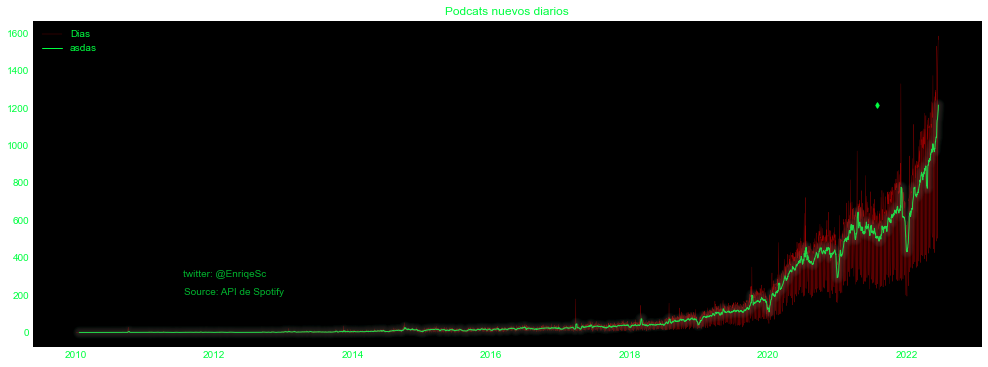

In [39]:
podcast_diarios = episodios[(episodios.release_date>pd.to_datetime("2010-01-01"))&(episodios.release_date<pd.to_datetime("2022-06-18"))].groupby("release_date").publiser.count()
podcast_diarios.name="Podcast diarios"

podcast_mm = podcast_diarios.rolling(window=7).mean()
podcast_mm.name = "Media movil"

plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#000000'  

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '#00ff41' 

fig, ax = plt.subplots(figsize=(17,6))
plt.plot(podcast_diarios, linewidth=0.3, alpha=0.6, c="red", label="Dias")
plt.plot(podcast_mm,linewidth=1, color="#00ff41", label="asdas")
plt.plot(pd.to_datetime("2021-07-28"), podcast_mm[-1], marker="d", color="#00ff41", markersize=4)

n_lines = 10
diff_linewidth = 1.05
alpha_value = 0.03

for n in range(1, n_lines+1):

    plt.plot(podcast_mm,
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value)
    
plt.legend(loc="upper left")
plt.text(pd.to_datetime("2012-10-01"), 300,'twitter: @EnriqeSc', ha='right', alpha=0.7)
plt.text(pd.to_datetime("2013-01-01"), 200,'Source: API de Spotify', ha='right', alpha=0.7)
plt.title("Podcats nuevos diarios")
plt.show()

#### Proceso de los podcasts

In [42]:
fechas_de_nacimiento = episodios.groupby("id_publiser").head(1)[["id_publiser", "total_episodios", "language",
                                                               "release_date"]]
fechas_de_nacimiento.rename(columns={"release_date":"bird_date"}, inplace=True)

fechas_de_sepelio = episodios.groupby("id_publiser").tail(1)[["id_publiser", "total_episodios", "language",
                                                               "release_date"]]


fecha_crecimiento = pd.merge(fechas_de_nacimiento, fechas_de_sepelio, on=["id_publiser", "total_episodios",
                                                                          "language"])

fecha_crecimiento["release_date"] = fecha_crecimiento["release_date"]+pd.Timedelta(weeks=7)
fecha_crecimiento["release_date"] = fecha_crecimiento["release_date"].apply(lambda x: pd.to_datetime("2021-07-29") if x>pd.to_datetime("2021-07-28") else x)

date_creados = pd.date_range(start=pd.to_datetime("2007-05-12"), end=pd.to_datetime("2021-07-28"), freq="D")

activos = []
nacidos = []
cerrados = []

for i in date_creados:
    activos.append(fecha_crecimiento[(fecha_crecimiento.bird_date<=i) & 
                  (i<=fecha_crecimiento.release_date)].shape[0])
    nacidos.append(fecha_crecimiento[fecha_crecimiento.bird_date==i].shape[0])
    cerrados.append(fecha_crecimiento[fecha_crecimiento.release_date<i].shape[0])
    
    
informacion_podcats = pd.DataFrame({"date":date_creados, "activos":activos, "nacidos":nacidos, "cerrados":cerrados})

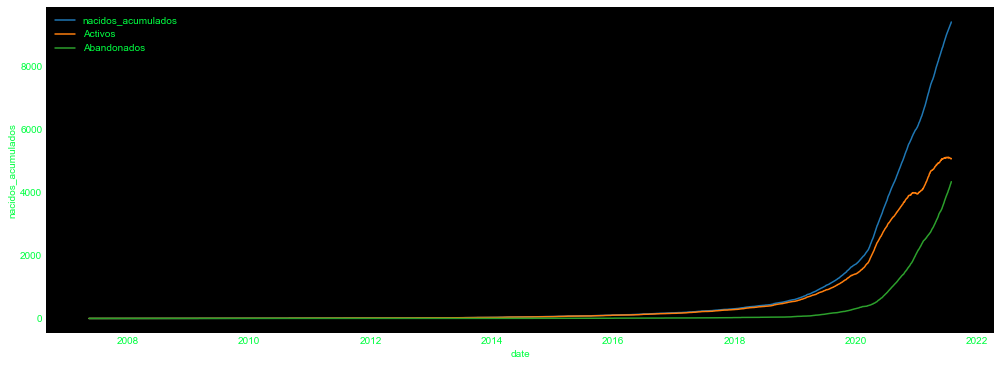

In [45]:
informacion_podcats["nacidos_acumulados"] = informacion_podcats.nacidos.cumsum()
fig, axs = plt.subplots(figsize=(17,6))
sns.lineplot(x="date", y="nacidos_acumulados", data=informacion_podcats, label='nacidos_acumulados')
sns.lineplot(x="date", y="activos", data=informacion_podcats, label='Activos')
sns.lineplot(x="date", y="cerrados", data=informacion_podcats, label="Abandonados")
plt.legend()
plt.show()